In [312]:
%%html
<style>
/* Any CSS style can go in here. */
.dataframe th {
    font-size: 8px;
}
.dataframe td {
    font-size: 8px;
}
</style>

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import polars as pl

sns.set(style="darkgrid", palette="Set2")

In [314]:
meta = pd.read_csv("external_data/PRECISE2_metadata.tsv", sep="\t")

In [315]:
df = pd.read_csv("external_data/PRECISE2_counts.csv")
gene_col = df.loc[:, "Geneid"]
df = df.drop("Geneid", axis=1) / df.drop("Geneid", axis=1).sum() * 10**6
df["Geneid"] = gene_col
df

,ecoli_00178,ecoli_00188,ecoli_00825,ecoli_00057,ecoli_00471,ecoli_00215,ecoli_00270,ecoli_00100,ecoli_00019,ecoli_00837,...,ecoli_00800,ecoli_00195,ecoli_00265,ecoli_00037,ecoli_00419,ecoli_00567,ecoli_00784,ecoli_00544,ecoli_00338,Geneid
0,175.274785,5.256807,191.287196,142.556361,5.047808,169.832825,8.696096,215.131459,2.001814,55.115122,...,203.718447,51.317742,44.647460,1.561809,33.781602,79.520490,15.467144,7.961227,46.077434,b0001
1,819.702311,3891.351329,5292.220000,1267.338341,189.956987,4080.023434,2193.088443,4421.078699,487.210644,5217.680469,...,3095.115440,4867.692824,2645.842067,2307.416468,3641.316035,3781.275661,3010.733126,303.024222,6775.297708,b0002
2,206.325401,1152.801332,1438.288251,450.711599,158.076094,1255.417695,930.816706,1226.334126,260.543745,1296.765239,...,1130.520302,1473.229174,708.478373,763.724552,1050.068450,835.493718,729.865416,119.252554,1984.800431,b0003
3,203.780268,1540.983668,1832.917814,469.452845,174.813563,1622.772261,1345.051880,1509.595259,206.648762,1619.483346,...,1056.994333,1970.714392,762.127336,901.476097,1713.635631,1150.521717,1202.608710,136.170162,2467.835557,b0004
4,13.065013,20.534402,28.542390,12.903809,42.773531,35.311776,45.152805,85.939505,8.161240,27.846425,...,32.313961,44.531925,12.122025,10.620301,49.394947,49.803084,45.176311,16.254173,30.758183,b0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4350,35.971205,27.598236,22.514804,37.175258,17.534491,30.715640,14.382004,33.640793,31.721047,25.073337,...,40.743689,36.049654,24.604111,34.359796,36.052634,18.323776,23.583566,12.273559,30.877865,b4399
4351,15.270794,11.581403,8.509532,15.668910,3.719438,12.106894,7.191002,8.198176,12.780810,8.203718,...,21.074322,14.278490,13.442246,9.370853,6.245338,15.269813,2.450241,8.292945,10.771348,b4400
4352,1626.000258,1027.295066,729.869682,546.875696,1704.565078,881.112875,969.280206,561.151047,2427.122049,718.229772,...,1046.223013,590.931575,1201.880810,1776.089081,522.195435,635.341701,744.873140,678.362926,431.452337,b4401
4353,3.054159,0.328550,2.836511,4.608503,4.250786,1.905715,4.180815,4.240436,0.461957,2.195361,...,3.278228,1.837825,3.000501,1.561809,1.419395,8.339667,1.071980,4.312332,1.795225,b4402


In [316]:
experiments_anaero = meta[meta["study"] == "ICA"].loc[:, ["Experiment", "condition_id"]]
experiments_anaero

exp_ids = list(experiments_anaero.loc[:, "Experiment"])
exp_cond = list(experiments_anaero.loc[:, "condition_id"])

In [317]:
output = df.loc[df["Geneid"] == "b3349", exp_ids]

output.columns = exp_cond

output.transpose()

,3324
wt_glc,907.760571
wt_glc,875.227940
wt_glc,1208.981078
wt_glc,1058.209773
arg_sbt,474.339861
arg_sbt,578.915884
cytd_rib,616.583642
cytd_rib,623.980218
gth,1422.243376
gth,2063.423682


# Check environments with hydrogenase activation

In [318]:
goi = ["b097"+str(i) for i in np.arange(2,8)] + ["b24"+str(i) for i in np.arange(81,93)] + ["b27"+str(i) for i in np.arange(17,26)] + ["b299"+str(i) for i in np.arange(0,8)]

goi

['b0972',
 'b0973',
 'b0974',
 'b0975',
 'b0976',
 'b0977',
 'b2481',
 'b2482',
 'b2483',
 'b2484',
 'b2485',
 'b2486',
 'b2487',
 'b2488',
 'b2489',
 'b2490',
 'b2491',
 'b2492',
 'b2717',
 'b2718',
 'b2719',
 'b2720',
 'b2721',
 'b2722',
 'b2723',
 'b2724',
 'b2725',
 'b2990',
 'b2991',
 'b2992',
 'b2993',
 'b2994',
 'b2995',
 'b2996',
 'b2997']

In [319]:
hydrogenase_expr = df.loc[df["Geneid"].isin(goi), :]
hydrogenase_expr = hydrogenase_expr.set_index("Geneid").transpose()
hydrogenase_expr.sort_values("b2995").tail(40)

Geneid,b0972,b0973,b0974,b0975,b0976,b0977,b2481,b2482,b2483,b2484,...,b2724,b2725,b2990,b2991,b2992,b2993,b2994,b2995,b2996,b2997
ecoli_00150,2.038902,4.077804,3.171625,5.663616,1.585813,4.983982,0.906179,7.702518,0.000000,0.906179,...,8.382152,14.725402,21.974830,22.201375,58.901607,102.624724,264.377599,135.020608,219.068670,304.702546
ecoli_00337,20.727883,26.650135,10.541609,8.883378,4.264022,10.423164,0.236890,3.434906,0.000000,0.829115,...,1.066005,0.473780,15.042521,21.912333,49.983809,89.426008,379.261031,135.501130,179.444242,230.257166
ecoli_00332,18.184774,29.603120,10.065061,8.288874,3.806115,11.164605,0.422902,3.298633,0.169161,0.845803,...,0.507482,0.338321,15.309042,17.592711,65.972668,102.765118,462.231578,141.502915,201.385798,299.076095
ecoli_00476,19.756117,24.492964,6.700905,5.892175,3.003854,6.238774,0.115533,1.732993,0.115533,1.386394,...,0.808730,0.577664,11.206686,12.824146,72.670162,111.720264,563.338169,144.416061,184.390426,230.719098
ecoli_00345,17.855998,29.681163,8.750622,8.632370,5.084821,11.825164,0.118252,2.956291,0.354755,1.537271,...,0.473007,0.591258,14.781456,22.349561,61.372604,96.729845,405.721393,146.395536,194.287452,256.487817
ecoli_00338,19.986835,30.159775,10.771348,7.779307,5.984082,10.771348,0.718090,2.872360,0.478727,0.718090,...,0.478727,0.718090,19.029382,19.388427,62.593501,92.992640,408.712824,146.729699,198.073125,264.975166
ecoli_00311,2.627034,2.627034,2.268802,3.343498,0.716464,2.985266,1.074696,2.746445,0.835875,2.627034,...,1.791160,0.716464,7.761693,10.508138,22.926846,55.048312,204.311632,149.860373,370.889497,666.550281
ecoli_00333,9.182184,16.527932,5.219347,8.215639,3.189601,5.219347,0.289964,3.576219,0.483273,1.353164,...,0.773237,0.289964,15.658041,17.784441,65.725109,98.201046,441.711397,157.063680,199.108420,275.562186
ecoli_00475,16.670743,18.461814,6.337638,5.648764,2.066621,6.613187,0.137775,3.031044,0.275549,1.102198,...,0.413324,0.275549,10.608654,15.430770,90.655773,123.032835,541.454695,157.200969,169.187370,229.946027
ecoli_00144,13.629811,24.854361,12.026304,19.242086,4.409645,16.435949,0.801754,6.414029,1.603507,3.207014,...,1.202630,0.000000,28.462253,29.264006,99.818323,119.461286,316.291793,157.945458,284.622526,505.104765


In [320]:
meta.loc[meta["Experiment"]=="ecoli_00213"].transpose()

,204
Experiment,ecoli_00213
sample_id,ytf__delybaO__1
study,yTF
project_id,ytf
condition_id,delybaO
rep_id,1
contact,Ye Gao
creator,Ye Gao
run_date,10/2/17
Strain Description,Escherichia coli K-12 MG1655 del_ybaO


In [321]:
goi_formate = ["b389"+str(i) for i in np.arange(1,5)] + ["b147"+str(i) for i in np.arange(4,7)] + ["b4079"]

goi_formate

['b3891', 'b3892', 'b3893', 'b3894', 'b1474', 'b1475', 'b1476', 'b4079']

In [322]:
formate_expr = df.loc[df["Geneid"].isin(goi_formate), :]
formate_expr = formate_expr.set_index("Geneid").transpose()
formate_expr.sort_values("b4079").tail(40)

Geneid,b1474,b1475,b1476,b3891,b3892,b3893,b3894,b4079
ecoli_00558,29.940303,5.121368,7.091124,153.247075,46.289284,51.804602,534.001055,266.311112
ecoli_00463,57.584002,16.936471,17.534229,84.682356,185.902679,339.127931,1635.664622,267.197741
ecoli_00464,55.146190,13.110226,17.064104,81.990940,188.745641,331.917637,1613.182145,271.568976
ecoli_00201,79.629899,7.189567,10.784350,92.375040,26.906409,15.032731,119.608247,272.441007
ecoli_00075,58.553746,3.708404,7.221629,99.346189,30.643127,16.785407,117.888208,273.836352
ecoli_00214,78.570948,5.330190,10.166844,101.372317,25.367756,19.050494,152.107829,275.985392
ecoli_00114,143.771816,10.501261,9.164737,186.158726,17.374814,11.264990,88.019664,277.806099
ecoli_00467,1148.178238,293.193423,295.405712,188.044605,124.799153,182.448814,912.244072,282.131976
ecoli_00544,21.893376,3.814755,4.312332,187.254705,75.963379,217.109308,1463.704847,285.774895
ecoli_00032,14.990436,2.435946,5.621414,116.738021,25.858502,22.673035,343.280987,287.816373


In [323]:
meta.loc[meta["Experiment"]=="ecoli_00477"].transpose()

,468
Experiment,ecoli_00477
sample_id,tcs__del_cusR_lb__1
study,Two Component Systems
project_id,tcs
condition_id,del_cusR_lb
rep_id,1
contact,Katherine Decker
creator,Julia Kleinmanns
run_date,6/27/19
Strain Description,Escherichia coli K-12 MG1655 del_cusR


/Users/cyrus/.pyenv/versions/viv-10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 3.496788194444436, 'Methionine synthase')

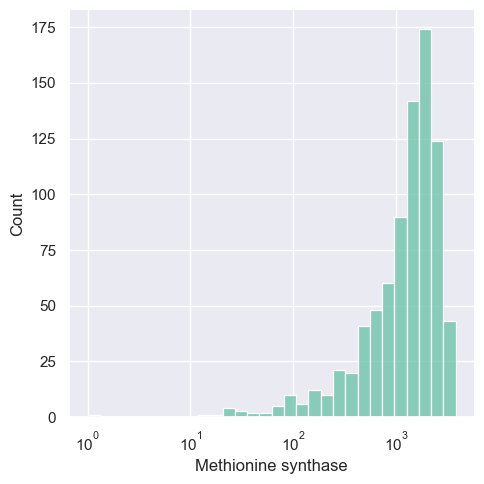

In [375]:
gene = "b0432"

random_expr = df.set_index("Geneid").transpose()
random_expr.loc[:, gene].sort_values().tail(40)

sns.displot(random_expr.loc[:, gene] + 1, log_scale=[10, False], bins=30)
plt.xlabel("Methionine synthase")

In [325]:


data_df

,Gene1,Gene2
0,495,3237
1,4241,6370
2,1934,8103
3,476,1488
4,140,358
...,...,...
815,5931,16085
816,2493,18337
817,3282,19779
818,468,8328


/Users/cyrus/.pyenv/versions/viv-10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cyrus/.pyenv/versions/viv-10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Transcript per million comparison for >800 RNAseq experiments (although no media contain lactose)')

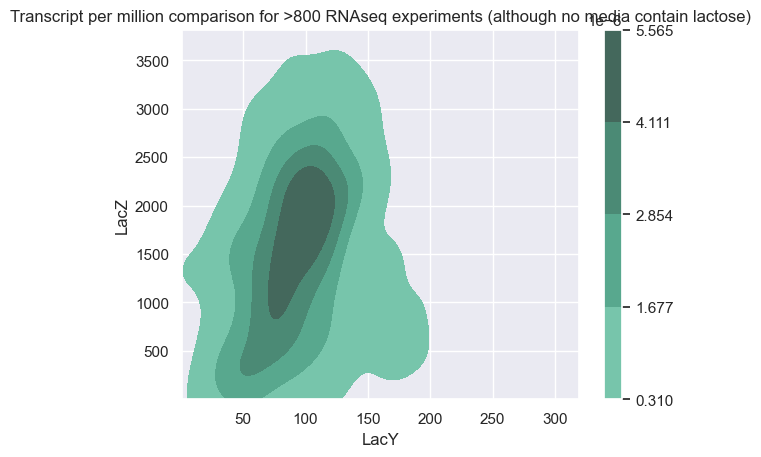

In [365]:
gene1 = "b1840"
gene2 = "b0432"

random_expr = df.set_index("Geneid").transpose()

data_df = pd.DataFrame([list(random_expr.loc[:, gene1] + 1), list(random_expr.loc[:, gene2])]).transpose()
data_df.columns = ["Gene1", "Gene2"]

# sns.scatterplot(x=random_expr.loc[:, gene1] + 1, y=random_expr.loc[:, gene2], label="TPM", alpha=0.3)
sns.kdeplot(x=random_expr.loc[:, gene1] + 1, y=random_expr.loc[:, gene2] + 1, 
            label="TPM", fill=True, cbar=True, bw_adjust=1, cut=0, levels=5)
# sns.scatterplot(x = np.linspace(0, 2500, 1000), y = np.linspace(0, 2500, 1000), label="y = x")
# sns.scatterplot(x = np.linspace(0, 2500, 1000), y = np.linspace(0, 7500, 1000), label="y = 3x")
plt.xlabel("LacY")
plt.ylabel("LacZ")
plt.title("Transcript per million comparison for >800 RNAseq experiments (although no media contain lactose)")
# plt.axis('equal')
# plt.xlim(0, 2000)
# plt.ylim(0, 4500)



In [202]:
gene = "b1841"

random_expr = df.set_index("Geneid").transpose()
random_expr = random_expr.loc[:, gene].sort_values().tail(40)

head_exp=list(random_expr.index)

cols = ['Experiment', 'study', 'condition_id', 'rep_id', 'creator', 'run_date', 'Strain Description', 
 'Base Media', 'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor', 'Trace Element Mixture', 
 'Supplement', 'Temperature (C)', 'pH', 'Growth Rate (1/hr)']

meta_cur = meta.loc[meta["Experiment"].isin(head_exp)].loc[:, cols]

expr_df = meta_cur.join(random_expr, on='Experiment', how='inner')
expr_cols = expr_df.columns.tolist()
expr_cols =  expr_cols[-1:] + expr_cols[:-1]

expr_df = expr_df[expr_cols]

expr_df.head(5)

cols = ['Experiment', 'study', 'condition_id', 'rep_id', 'creator', 'run_date', 'Strain Description', 
 'Base Media', 'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor', 'Trace Element Mixture', 
 'Supplement', 'Temperature (C)', 'pH', 'Growth Rate (1/hr)']

# meta_cur = meta.loc[meta["Experiment"].isin(head_exp)].loc[:, cols]

random_expr = df.set_index("Geneid").transpose()
random_expr = random_expr.loc[:, gene].sort_values().tail(40)

meta_cur.join(random_expr, on='Experiment').sort_values(by=gene)

,Experiment,study,condition_id,rep_id,creator,run_date,Strain Description,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,Trace Element Mixture,Supplement,Temperature (C),pH,Growth Rate (1/hr),b1841
135,ecoli_00136,42C Evolution,42c_ale4,1,Richard Szubin,5/2/13,Escherichia coli 42C.4.161.1,M9,glucose(4),NH4Cl(1),O2,sauer trace element mixture,NaN,42,7.0,1.030000,1429
483,ecoli_00492,Two Component Systems,del_zraR_lb,2,Julia Kleinmanns,9/23/19,Escherichia coli K-12 MG1655 del_zraR,LB,NaN,NaN,O2,NaN,NaN,37,7.0,NaN,1429
624,ecoli_00633,pColi,btAANAT,2,Justin Tan,3/8/18,Escherichia Coli K-12 MG1655 btAANAT,M9,glycerol(4),NH4Cl(1),O2,NaN,rhamnose(0.1),37,7.0,0.599375,1436
600,ecoli_00609,ROS TALE,25_111_250pq,2,Justin Tan,9/5/19,Escherichia Coli ERS.25.111,M9,glucose(4),NH4Cl(1),O2,NaN,paraquat (250uM),37,7.0,NaN,1440
507,ecoli_00516,Two Component Systems,wt_zncl2,2,Julia Kleinmanns,9/23/19,Escherichia coli K-12 MG1655,LB,NaN,NaN,O2,NaN,ZnCl2(1mM),37,7.0,NaN,1445
506,ecoli_00515,Two Component Systems,wt_zncl2,1,Julia Kleinmanns,9/23/19,Escherichia coli K-12 MG1655,LB,NaN,NaN,O2,NaN,ZnCl2(1mM),37,7.0,NaN,1450
597,ecoli_00606,ROS TALE,25_111_0pq,1,Justin Tan,9/5/19,Escherichia Coli ERS.25.111,M9,glucose(4),NH4Cl(1),O2,NaN,NaN,37,7.0,NaN,1464
616,ecoli_00625,pColi,bpTDC,2,Justin Tan,3/8/18,Escherichia Coli K-12 MG1655 bpTDC,M9,glycerol(4),NH4Cl(1),O2,NaN,rhamnose(0.1),37,7.0,0.642599,1470
268,ecoli_00277,Pseudogene Repair,menFentCubiC_ale38,1,Richard Szubin,5/21/18,Escherichia coli EEP_menF_entC_ubiC.38.28.1,M9,glucose(4),NH4Cl(1),O2,sauer trace element mixture,NaN,37,7.0,0.580000,1479
498,ecoli_00507,Two Component Systems,wt_LiAcet,1,Julia Kleinmanns,9/20/19,Escherichia coli K-12 MG1655,M9,glucose(4),NH4Cl(1),O2,NaN,Acetoacetate/LiCl(10mM),37,7.0,NaN,1490


In [ ]:
gene = "b1839"
gene2 = "b0432"

random_expr = df.set_index("Geneid").transpose()
random_expr = random_expr.loc[:, gene].sort_values().tail(40)

head_exp=list(random_expr.index)

cols = ['Experiment', 'study', 'condition_id', 'rep_id', 'creator', 'run_date', 'Strain Description', 
 'Base Media', 'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor', 'Trace Element Mixture', 
 'Supplement', 'Temperature (C)', 'pH', 'Growth Rate (1/hr)']

meta_cur = meta.loc[meta["Experiment"].isin(head_exp)].loc[:, cols]

expr_df = meta_cur.join(random_expr, on='Experiment', how='inner')
expr_cols = expr_df.columns.tolist()
expr_cols =  expr_cols[-1:] + expr_cols[:-1]

expr_df = expr_df[expr_cols]

expr_df.head(5)

cols = ['Experiment', 'study', 'condition_id', 'rep_id', 'creator', 'run_date', 'Strain Description', 
 'Base Media', 'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor', 'Trace Element Mixture', 
 'Supplement', 'Temperature (C)', 'pH', 'Growth Rate (1/hr)']

# meta_cur = meta.loc[meta["Experiment"].isin(head_exp)].loc[:, cols]

random_expr = df.set_index("Geneid").transpose()
random_expr = random_expr.loc[:, gene].sort_values().tail(40)

meta_cur.join(random_expr, on='Experiment').sort_values(by=gene)

# Check metal transporters

In [80]:
meta["study"].unique()

array(['Control', 'Fur', 'Acid', 'Oxidative', 'Nac/NtrC', 'Misc', 'Omics',
       'OmpR', 'MinSpan', 'Cra/Crp', 'RpoB Knock-in', 'Crp ARs',
       'Glucose Evolution', '42C Evolution',
       'Substrate-switching Evolution', 'ICA', 'yTF', 'False Positives',
       'Enzyme Promiscuity', 'Pseudogene Repair', 'Miscellaneous #2',
       'Naphthoquinone', 'Respiratory quinone', 'OxyR ALE', 'SvNS PGI',
       'AntibiotICA', 'HOT ALE', 'pdhR-ALE', 'Two Component Systems',
       'ROS TALE', 'pColi', 'CCK', 'CCK_pgi', 'CCK_sdhCB', 'CCK_ptsHIcrr',
       'CCK_gnd', 'CCK_tpiA', 'pH ALE', 'adnB', 'yTF 2', 'yTF 3'],
      dtype=object)

In [85]:
meta[(meta["study"] == "Two Component Systems") & (meta["Strain Description"] == "Escherichia coli K-12 MG1655")]

,Experiment,sample_id,study,project_id,condition_id,rep_id,contact,creator,run_date,Strain Description,...,Sequencing Machine,Additional Details,Biological Replicates,DOI,GEO,Published,SRX,Run,LibraryLayout,Platform
486,ecoli_00495,tcs__wt_01-kcl__1,Two Component Systems,tcs,wt_01-kcl,1,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
487,ecoli_00496,tcs__wt_01-kcl__2,Two Component Systems,tcs,wt_01-kcl,2,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
488,ecoli_00497,tcs__wt_01xlb__1,Two Component Systems,tcs,wt_01xlb,1,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
489,ecoli_00498,tcs__wt_01xlb__2,Two Component Systems,tcs,wt_01xlb,2,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
490,ecoli_00499,tcs__wt_115-kcl__1,Two Component Systems,tcs,wt_115-kcl,1,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
491,ecoli_00500,tcs__wt_115-kcl__2,Two Component Systems,tcs,wt_115-kcl,2,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
492,ecoli_00501,tcs__wt_CuSO4__1,Two Component Systems,tcs,wt_CuSO4,1,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
493,ecoli_00502,tcs__wt_CuSO4__2,Two Component Systems,tcs,wt_CuSO4,2,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
494,ecoli_00503,tcs__wt_etoh__1,Two Component Systems,tcs,wt_etoh,1,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
495,ecoli_00504,tcs__wt_etoh__2,Two Component Systems,tcs,wt_etoh,2,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA


In [87]:
exp_sox = list(meta[meta["study"] == "Control"]["Experiment"]) + list(meta[meta["study"] == "Oxidative"]["Experiment"])
exp_sox

['ecoli_00001',
 'ecoli_00002',
 'ecoli_00019',
 'ecoli_00020',
 'ecoli_00021',
 'ecoli_00022',
 'ecoli_00023',
 'ecoli_00024',
 'ecoli_00025',
 'ecoli_00026']

In [92]:

goi = ["b3040", "b1973", "b1859", "b3915", "b2392", "b3469", "b3493", "b0752"]

cur_expr_df = df.set_index("Geneid").loc[goi, exp_sox]


cur_expr_df

,ecoli_00001,ecoli_00002,ecoli_00019,ecoli_00020,ecoli_00021,ecoli_00022,ecoli_00023,ecoli_00024,ecoli_00025,ecoli_00026
Geneid,,,,,,,,,,
b3040,345,240,1571,1770,1704,1910,1583,1682,2271,1636
b1973,23,17,44387,40725,77,94,41394,44516,234,171
b1859,122,49,692,716,158,183,491,550,177,140
b3915,625,473,1095,1088,1039,1059,751,873,1279,927
b2392,390,316,11716,9145,2567,2587,7229,8831,11167,7630
b3469,290,247,215,245,627,654,203,195,324,246
b3493,1114,760,590,598,654,828,425,512,607,392
b0752,192,120,695,844,851,1029,507,594,798,609


# Li 2014

In [17]:
li = pl.read_csv("external_data/Li_2014_profiling.csv")
li.head(5)

Gene,MOPS complete,MOPS minimal,MOPS complete without methionine
str,i64,i64,i64
"""aaeA""",62,5,21
"""aaeB""",16,2,0
"""aaeR""",203,79,141
"""aaeX""",28,5,11
"""aas""",188,80,162


In [18]:
li = li.with_columns( ( (pl.col("MOPS complete without methionine") + 10) / (10 + pl.col("MOPS complete"))).alias("dropout FC") )
li = li.with_columns( ( (pl.col("MOPS minimal") + 10) / (10 + pl.col("MOPS complete"))).alias("minimal FC") )
li.head(5)

Gene,MOPS complete,MOPS minimal,MOPS complete without methionine,dropout FC,minimal FC
str,i64,i64,i64,f64,f64
"""aaeA""",62,5,21,0.430556,0.208333
"""aaeB""",16,2,0,0.384615,0.461538
"""aaeR""",203,79,141,0.70892,0.41784
"""aaeX""",28,5,11,0.552632,0.394737
"""aas""",188,80,162,0.868687,0.454545


In [368]:
li.sort("dropout FC").tail(40)

Gene,MOPS complete,MOPS minimal,MOPS complete without methionine,dropout FC,minimal FC
str,i64,i64,i64,f64,f64
"""gsiB""",71,574,686,8.592593,7.209877
"""ilvX""",102,972,1022,9.214286,8.767857
"""iaaA""",74,257,809,9.75,3.178571
"""metL""",972,581,9779,9.968432,0.601833
"""metC""",596,1256,7277,12.024752,2.089109
"""cysM""",473,1411,5838,12.10766,2.942029
"""iraD""",7,44,218,13.411765,3.176471
"""yeeD""",477,2008,6555,13.480493,4.143737
"""znuA""",3453,25238,57733,16.674271,7.290788


In [20]:
li.sum()

Gene,MOPS complete,MOPS minimal,MOPS complete without methionine,dropout FC,minimal FC
str,i64,i64,i64,f64,f64
null,18051444,5627623,10452920,9375.465686,6772.563954
